In [3]:
import sys
import os
import re

%matplotlib notebook
# %matplotlib inline
%config InlineBackend.figure_format = 'retina'
from matplotlib import pylab as plt
import sys
import glob, os

# import glob
# metob.load_lcms_files(glob.glob('/project/projectdirs/metatlas/data_for_metatlas_2/20150504_LPSilva_Actino_HILIC_POS_51isolates/*.*’))


curr_ld_lib_path = ''
os.environ['LD_LIBRARY_PATH'] = curr_ld_lib_path + ':/project/projectdirs/openmsi/jupyterhub_libs/boost_1_55_0/lib' + ':/project/projectdirs/openmsi/jupyterhub_libs/lib'
import sys
# sys.path.remove('/anaconda/lib/python2.7/site-packages')
sys.path.append('/global/project/projectdirs/openmsi/jupyterhub_libs/anaconda/lib/python2.7/site-packages')

sys.path.insert(0,'/global/project/projectdirs/metatlas/anaconda/lib/python2.7/site-packages' )

from metatlas import metatlas_objects as metob
from metatlas import h5_query as h5q
from metatlas import mzml_to_hdf




sys.path.append('/project/projectdirs/openmsi/projects/meta-iq/pactolus/pactolus')

import score_frag_dag

In [2]:

# %matplotlib notebook
# # %matplotlib inline
# %config InlineBackend.figure_format = 'retina'
# from matplotlib import pylab as plt
# import sys
# sys.path.insert(0,'/global/project/projectdirs/metatlas/anaconda/lib/python2.7/site-packages' )
# from metatlas import metatlas_objects as metob
# from metatlas import h5_query as h5q
# from metatlas import mzml_to_hdf
# import glob, os


In [4]:
import tables

import numpy as np

In [8]:
my_run = metob.retrieve('lcmsrun', name='%20150910_C18_MeOH_NEG_MSMS_Scoelicolor_media_WT_M145_Day6_1of4___Run57%')
print my_run

[{'creation_time': '2015-09-20T03:35:05',
 'description': u'20150914_actinorhodin_finalset_50mm 20150910_C18_MeOH_NEG_MSMS_Scoelicolor_media_WT_M145_Day6_1of4___Run57.mzML',
 'hdf5_file': u'/project/projectdirs/metatlas/raw_data/kblouie/20150914_actinorhodin_finalset_50mm/20150910_C18_MeOH_NEG_MSMS_Scoelicolor_media_WT_M145_Day6_1of4___Run57.h5',
 'head_id': u'6565a00f91ae4d739fbbdcab3bf98b86',
 'last_modified': '2015-10-08T18:32:38',
 'method': None,
 'mzml_file': u'/project/projectdirs/metatlas/raw_data/kblouie/20150914_actinorhodin_finalset_50mm/20150910_C18_MeOH_NEG_MSMS_Scoelicolor_media_WT_M145_Day6_1of4___Run57.mzML',
 'name': u'20150910_C18_MeOH_NEG_MSMS_Scoelicolor_media_WT_M145_Day6_1of4___Run57.mzML',
 'prev_uid': u'origin',
 'sample': None,
 'unique_id': u'6565a00f91ae4d739fbbdcab3bf98b86',
 'username': u'kblouie'}]


<IPython.core.display.Javascript object>


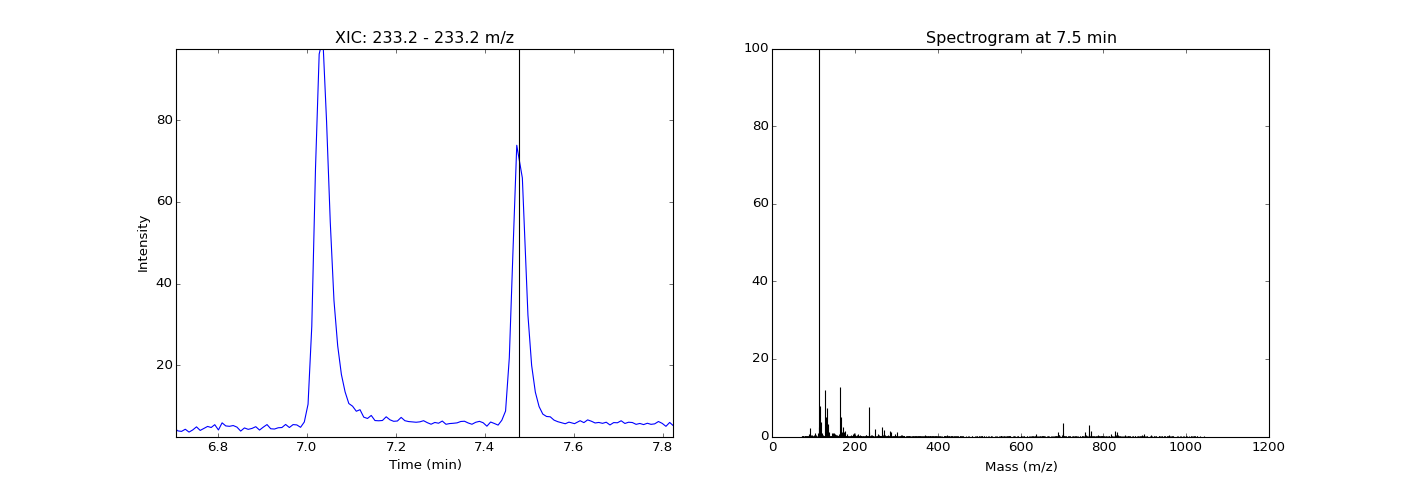

In [36]:
my_run.interact(min_mz = 233.153, max_mz = 233.155)  #, polarity = 'positive', ms_level=1)

In [33]:
target_mz = 233.15416
target_mz_tolerance = 105
target_rt_min = 7.1
target_rt_max = 7.15

with tables.open_file(my_run[0].hdf5_file) as fid:
    data = h5q.get_data(fid,2,0)#,min_rt = 0,max_rt = 7.15)

# with tables.open_file(my_run[0].hdf5_file) as fid:
#     data = h5q.get_spectrogram(fid,7.1,7.15,2,0)
    
    
    
    
    
#     do something with data
    
# fid = tables.open_file(my_run.hdf5_file)


# data = h5q.get_data(fid,2,0,
#                                  min_precursor_mz = target_mz - target_mz * target_mz_tolerance / 1e6,
#                                  max_precursor_mz = target_mz + target_mz * target_mz_tolerance / 1e6,
# #                                  max_mz = mz_ref.mz + mz_ref.mz*mz_ref.mz_tolerance/1e6,
#                                  min_rt = 7.1,
#                                  max_rt = 7.15,
#                                  )


# other_data = h5q.get_data(fid,2,0,
#                                  min_precursor_mz = target_mz - target_mz * target_mz_tolerance / 1e6,
#                                  max_precursor_mz = target_mz + target_mz * target_mz_tolerance / 1e6,
# #                                  max_mz = mz_ref.mz + mz_ref.mz*mz_ref.mz_tolerance/1e6,
#                                  min_rt = 7.4,
#                                  max_rt = 7.6,
#                                  )
# print other_data

In [36]:
# data['precursor_MZ']
# data['mz']
urt,idx = np.unique(data['rt'],return_index=True)
idx
sx = np.argsort(data['precursor_intensity'][idx])[::-1]
rt = data['rt'][idx[sx]]
pmz = data['precursor_MZ'][idx[sx]]



# data['i']
# data['precursor_MZ']
# idx = np.argsort(data['precursor_intensity'])[::-1]
# data['precursor_intensity'][idx]
# data['collision_energy']

array([    0,    50,    87, ..., 63615, 63629, 63640])

In [38]:
arr = np.array([data['mz'], data['i']]).T

other_arr = np.array([other_data['mz'], other_data['i']]).T

In [39]:
pos_mode_neutralizations = [-1.00727646677, -(1.00727646677+1.00782504), +5.4857990946e-4,]
neg_mode_neutralizations = [-el for el in pos_mode_neutralizations]



# make lookup table
path_to_trees = '/project/projectdirs/openmsi/projects/pactolus_trees/'
all_my_h5_files = glob.glob('/project/projectdirs/openmsi/projects/pactolus_trees/*_hdf5_5_*.h5')
my_tree_filename = 'metacyc_max_depth_5'

if not os.path.isfile(os.path.join(path_to_trees, my_tree_filename + '.npy')):
    score_frag_dag.make_file_lookup_table_by_MS1_mass(all_my_h5_files, 
                                                      path=path_to_trees, 
                                                      save_result='metacyc_max_depth_5')

maxdepth_5_table = os.path.join(path_to_trees, my_tree_filename + '.npy')

params = {'file_lookup_table': maxdepth_5_table,
          'ms1_mass_tol': 0.05,
          'ms2_mass_tol': 0.05,
          'neutralizations': neg_mode_neutralizations,
          'max_depth': 5,
              }

print neg_mode_neutralizations

[1.00727646677, 2.0151015067699998, -0.00054857990946]


In [40]:
foo = score_frag_dag.score_scan_list_against_trees([arr], [233.15416], params)

goo = score_frag_dag.score_scan_list_against_trees([other_arr], [233.15416], params)

In [41]:
my_db = '/project/projectdirs/openmsi/projects/meta-iq/pactolus/data/' + 'MetaCyc.mdb'
score_frag_dag.make_pactolus_hit_table(foo, maxdepth_5_table, original_db=my_db)

[array([ (0.015110592357814312, 'MetaCyC_2733', 'hexahomomethionine', 233.1449432373047, 0, 0),
        (0.014537686482071877, 'MetaCyC_1934', '<i>N</i>-hydroxypentahomomethionine', 235.1242218017578, 0, 0),
        (0.012929420918226242, 'MetaCyC_7802', 'hypusine', 233.17393493652344, 0, 0),
        (0.004080670420080423, 'MetaCyC_3090', 'benzoylagmatine', 234.14805603027344, 0, 0),
        (0.0025476720184087753, 'MetaCyC_6245', 'valerenate', 234.1619873046875, 0, 0),
        (0.002477940870448947, 'MetaCyC_6292', 'germacra-1(10),4,11(13)-trien-12-oate', 234.1619873046875, 0, 0),
        (0.002457348397001624, 'MetaCyC_6264', 'artemisinate', 234.1619873046875, 0, 0),
        (0.0019356897100806236, 'MetaCyC_2501', '<i>(S)</i>-tetrahydroprotoberberine', 235.13609313964844, 0, 0),
        (0.0007530995062552392, 'MetaCyC_6315', 'zealexin A1', 234.1619873046875, 0, 0),
        (0.0004803831980098039, 'MetaCyC_6244', '1-deoxypentalenate', 234.1619873046875, 0, 0),
        (0.000263009249

In [42]:
score_frag_dag.make_pactolus_hit_table(goo, maxdepth_5_table, original_db=my_db)

[array([ (0.2803122401237488, 'MetaCyC_6264', 'artemisinate', 234.1619873046875, 0, 0),
        (0.2792266309261322, 'MetaCyC_6292', 'germacra-1(10),4,11(13)-trien-12-oate', 234.1619873046875, 0, 0),
        (0.22938568890094757, 'MetaCyC_6315', 'zealexin A1', 234.1619873046875, 0, 0),
        (0.18543748557567596, 'MetaCyC_6244', '1-deoxypentalenate', 234.1619873046875, 0, 0),
        (0.15156851708889008, 'MetaCyC_6245', 'valerenate', 234.1619873046875, 0, 0),
        (0.09060916304588318, 'MetaCyC_1934', '<i>N</i>-hydroxypentahomomethionine', 235.1242218017578, 0, 0),
        (0.08954767882823944, 'MetaCyC_2733', 'hexahomomethionine', 233.1449432373047, 0, 0),
        (0.06299766898155212, 'MetaCyC_6247', '2-dehydrolubimin', 234.1619873046875, 0, 0),
        (0.062352992594242096, 'MetaCyC_7802', 'hypusine', 233.17393493652344, 0, 0),
        (0.05905044823884964, 'MetaCyC_6203', '15-hydroxysolavetivone', 234.1619873046875, 0, 0),
        (0.05555211007595062, 'MetaCyC_3090', 'benzo

In [49]:
XVGBKWQWYRNGDG-UHFFFAOYSA-N

('/project/projectdirs/openmsi/projects/pactolus_trees/FragTreeLibrary_test_hdf5_5_DCFDRCCHOOORSB-UHFFFAOYSA-N.h5', 234.161979944)

In [50]:
233.15416+1.00727646677

234.16143646677

In [51]:
234.161979944-234.16143646677

0.0005434772299963697

In [68]:
foo = np.load(maxdepth_5_table)

In [69]:
foo

array([ ('/project/projectdirs/openmsi/projects/pactolus_trees/FragTreeLibrary_test_hdf5_5_OOXWYYGXTJLWHA-UHFFFAOYSA-N.h5', 40.031300128),
       ('/project/projectdirs/openmsi/projects/pactolus_trees/FragTreeLibrary_test_hdf5_5_XZMCDFZZKTWFGF-UHFFFAOYSA-N.h5', 42.021798063999995),
       ('/project/projectdirs/openmsi/projects/pactolus_trees/FragTreeLibrary_test_hdf5_5_QQONPFPTGQHPMA-UHFFFAOYSA-N.h5', 42.046950192),
       ...,
       ('/project/projectdirs/openmsi/projects/pactolus_trees/FragTreeLibrary_test_hdf5_5_NTXGVHCCXVHYCL-UHFFFAOYSA-N.h5', 926.6318285440028),
       ('/project/projectdirs/openmsi/projects/pactolus_trees/FragTreeLibrary_test_hdf5_5_HMTFXPJOBPIOIN-UHFFFAOYSA-N.h5', 952.7187878080008),
       ('/project/projectdirs/openmsi/projects/pactolus_trees/FragTreeLibrary_test_hdf5_5_RGHRJBIKIYUHEV-UHFFFAOYSA-N.h5', 952.7187878080008)], 
      dtype=[('filename', 'S400'), ('ms1_mass', '<f8')])